In [1]:
import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error
import tensorflow as tf



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
#from keras.models import load_model
from tensorflow.keras.models import load_model
import os
from matplotlib import pyplot as plt
from data_split import data_split
from many_net import many_net, many_net_diffv, many_net_only_diff

Using TensorFlow backend.


In [2]:
#from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, BatchNormalization, Flatten

from keras.regularizers import l2 as regularizer_l2

from keras.optimizers import Adam
#from keras.utlils.np_utils import to_categorical

In [3]:
os.getcwd()

'/Users/stefabo/Documents/GitHub/eduRNN'

Importing the data

In [2]:
import csv
trajs_from_files = csv.reader(open('validation_for_scoring/task1.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])

In [8]:
len(validation[0])

10000

In [4]:
#checking trajectory lengths
trl=[]
for traj in validation[0]:
    trl.append(len(traj))

In [6]:
np.min(trl)

10

(array([1023., 1016.,  980.,  995., 1006.,  999.,  983.,  973., 1035.,
         990.]),
 array([ 10. , 108.9, 207.8, 306.7, 405.6, 504.5, 603.4, 702.3, 801.2,
        900.1, 999. ]),
 <a list of 10 Patch objects>)

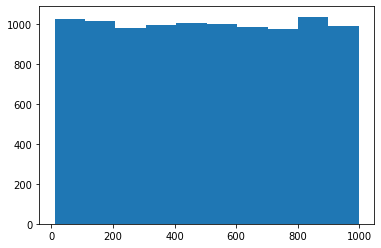

In [7]:
plt.hist(trl)

Importing the networks

In [5]:
model_norm_long2=load_model('task1_1d_norm_long2.h5')

model_norm_chi=load_model('task1_1d_v0_norm_chi.h5')

model_norm_short=tf.keras.models.load_model('Model_1D_recdout_125.h5')

model_norm_short2=load_model('task1_1d_v0_norm_short.h5')



In [3]:
meta_model=[]
for i in [25,125,225,325,425,525,625,725,825]:
    m=load_model('Model_1D_recdout_'+str(i)+'.h5')
    #m=tf.keras.models.load_model('Model_1D_recdout_'+str(i)+'.h5')


    meta_model.append(m)
    

In [4]:
#adding the net for 925, which in this case is just the same as for 825
meta_model.append(m)

In [6]:
meta_model=[model_norm_short, model_norm_chi, model_norm_long2]

If some of the networks take the diff and some not use many_net_diffv. Recall that di is the array of dimensions of input of different nets

In [8]:
predictions=many_net_diffv(meta_model,validation[0],diffv=[True,True,True,True,True,True,True,True,True,True])

KeyboardInterrupt: 

If none of the networks require the diff use

In [ ]:
predictions=many_net(meta_model,validation[0])

If all of the networks require the diff use

In [13]:
many_net_only_diff(meta_model,validation[0][:70])

array([0.32736498, 1.1822402 , 0.6613616 , 0.2508543 , 0.49747157,
       1.8241448 , 0.8454288 , 1.2594107 , 0.91689694, 1.4055531 ,
       1.483054  , 1.1632504 , 0.3163348 , 0.8123871 , 0.48969966,
       0.78882694, 1.7056283 , 0.20571262, 1.142442  , 0.25104278,
       1.2915603 , 0.17778127, 0.9540634 , 0.7009492 , 1.1210418 ,
       1.811034  , 0.75635135, 1.5432248 , 1.0367672 , 0.775295  ,
       1.5699303 , 0.66400677, 0.4783275 , 0.16034767, 0.77768534,
       1.5636365 , 0.7562591 , 0.7085756 , 0.24639511, 2.0156684 ,
       1.2285941 , 1.1987021 , 0.44213712, 0.14624494, 1.3646408 ,
       1.9338408 , 1.1284757 , 1.4540277 , 0.3258593 , 0.70307946,
       0.7330279 , 0.8469565 , 1.0137208 , 0.6810353 , 0.6839657 ,
       1.696544  , 0.55309665, 1.8664839 , 1.6938292 , 1.7886535 ,
       1.8421516 , 1.573755  , 1.3928022 , 1.5869473 , 1.6732504 ,
       0.2701274 , 0.323162  , 0.42635497, 1.8288655 , 0.46632165],
      dtype=float32)

In [5]:
predictions=many_net_only_diff(meta_model,validation[0])

In [6]:
pred_to_txt = np.ones((len(predictions), 2))
pred_to_txt[:, 1] = predictions

np.savetxt('task1.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [10]:
predictions_nois=predictions+np.random.normal(0.05,len(predictions))

In [11]:
pred_to_txt = np.ones((len(predictions_nois), 2))
pred_to_txt[:, 1] = predictions

np.savetxt('task1.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')